In [1]:
import pandas as pd
import numpy as np
import umap
import numbers
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

np.random.seed(42)

In [2]:
df = pd.read_csv('./GSE150150_raw_counts.csv')

# Preprocessing Data

In [3]:
columns = ["Trunk E9.5", "Trunk E10.5", "DRG E9.5", "DRG E10.5", "DRG E11.5", "DRG E12.5", "Cranio E12.5"]
idMappings = {
    "SS2_15_0085": "Trunk E9.5",
    "SS2_18_107": "Trunk E10.5",
    "SS2_18_108": "Trunk E10.5",
    "SS2_18_109": "Trunk E10.5",
    "SS2_16_767": "DRG E9.5",
    "SS2_17_435": "DRG E9.5",
    "SS2_16_688": "DRG E10.5",
    "SS2_16_769": "DRG E10.5",
    "SS2_17_432": "DRG E10.5",
    "SS2_17_433": "DRG E10.5",
    "SS2_16_385": "DRG E11.5",
    "SS2_16_384": "DRG E12.5",
    "SS2_15_0073": "Cranio E12.5",
    "SS2_15_0169": "Cranio E12.5"
}

In [4]:
df.columns = [idMappings[col.split(":")[0]] if col.split(":")[0] in idMappings else col for col in df.columns]
dfParsed = df.groupby(df.columns, axis=1).apply(lambda x: x.mean(axis=1) if isinstance(x.iloc[0,0], numbers.Number) else x.iloc[:,0])
dfParsed = dfParsed[dfParsed.columns[5:].tolist() + dfParsed.columns[:5].tolist()]

In [5]:
X = dfParsed.iloc[:,1:].values
counts = X

In [6]:
scaled_data = StandardScaler().fit_transform(counts)

In [7]:
np.log10(counts[0], where=counts[0] > 0)

array([1.09080528, 3.38915085, 3.7162723 , 2.44768987, 2.58472277,
       2.7315426 , 2.85168823])

In [8]:
log_data = np.log10(counts, where=counts>0)

In [9]:
log_array = np.array(log_data)

# t-SNE

In [10]:
tsne = TSNE(n_components=2, perplexity = 40, random_state=0, learning_rate='auto', init='pca')

In [11]:
# count_tsne = tsne.fit_transform(counts)

In [12]:
# plt.scatter(count_tsne[:, 0], count_tsne[:, 1], s=0.75)
# plt.title("t-SNE for Counts")

In [13]:
scaled_tsne = tsne.fit_transform(scaled_data)

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Text(0.5, 1.0, 't-SNE for Scaled Data')

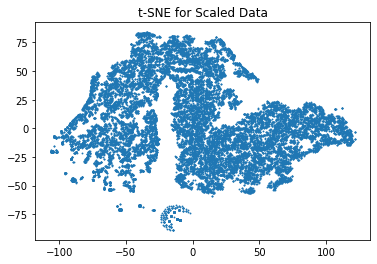

In [14]:
plt.scatter(scaled_tsne[:, 0], scaled_tsne[:, 1], s=0.75)
plt.title("t-SNE for Scaled Data")

In [15]:
log_tsne = tsne.fit_transform(log_array)

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Text(0.5, 1.0, 't-SNE for Log Transformation')

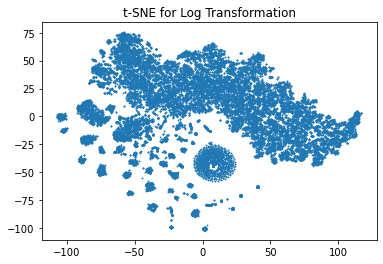

In [16]:
plt.scatter(log_tsne[:, 0], log_tsne[:, 1], s=0.75)
plt.title("t-SNE for Log Transformation")

# UMAP

In [17]:
umapper = umap.UMAP(n_neighbors=30, min_dist=0.3, metric='correlation', random_state=42)

In [18]:
count_umap = umapper.fit_transform(counts)

Text(0.5, 1.0, 'UMAP for Counts')

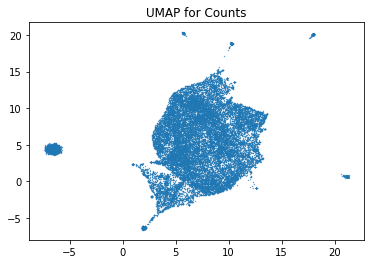

In [19]:
plt.scatter(count_umap[:, 0], count_umap[:, 1], s=0.1)
plt.title("UMAP for Counts")

In [20]:
scaled_umap = umapper.fit_transform(scaled_data)

Text(0.5, 1.0, 'UMAP for Scaled Data')

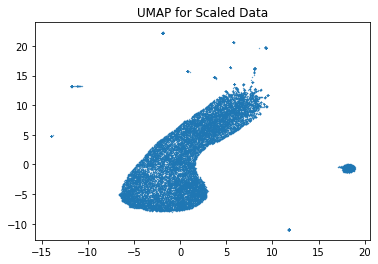

In [21]:
plt.scatter(scaled_umap[:, 0], scaled_umap[:, 1], s=0.1)
plt.title("UMAP for Scaled Data")

In [22]:
log_umap = umapper.fit_transform(log_array)

Text(0.5, 1.0, 'UMAP for Log Transformation')

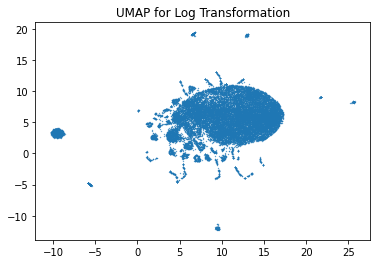

In [23]:
plt.scatter(log_umap[:, 0], log_umap[:, 1], s=0.1)
plt.title("UMAP for Log Transformation")

# DBScan

In [24]:
dbscan_df = pd.DataFrame(scaled_tsne, columns = ['axis-1', 'axis-2'])

In [25]:
nbrs = NearestNeighbors(n_neighbors = 15).fit(dbscan_df)
neigh_dist, neigh_ind = nbrs.kneighbors(dbscan_df)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

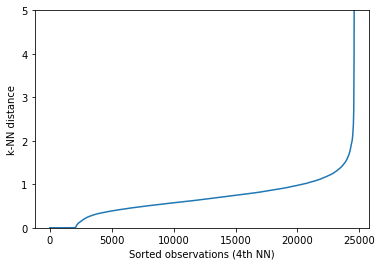

In [26]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.ylim([0, 5])
plt.show()

In [27]:
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)
print(kneedle.knee_y)

2.376407154471951


In [28]:
clusters = DBSCAN(eps = 2.38, min_samples = 25).fit(dbscan_df)

In [29]:
Counter(clusters.labels_)

Counter({-1: 1229,
         0: 7284,
         22: 112,
         7: 178,
         2: 2083,
         1: 337,
         3: 83,
         4: 50,
         5: 121,
         11: 3194,
         6: 404,
         14: 440,
         8: 439,
         26: 572,
         9: 213,
         10: 96,
         12: 178,
         13: 241,
         19: 27,
         15: 104,
         33: 95,
         16: 152,
         17: 107,
         18: 261,
         20: 816,
         31: 386,
         21: 145,
         23: 227,
         27: 29,
         24: 59,
         25: 214,
         28: 95,
         29: 122,
         30: 73,
         63: 34,
         65: 29,
         32: 1051,
         34: 122,
         35: 77,
         36: 64,
         68: 25,
         37: 120,
         67: 23,
         41: 57,
         38: 68,
         39: 78,
         40: 51,
         43: 255,
         42: 71,
         44: 114,
         45: 132,
         54: 67,
         56: 36,
         66: 28,
         46: 62,
         51: 69,
         64: 27,
     

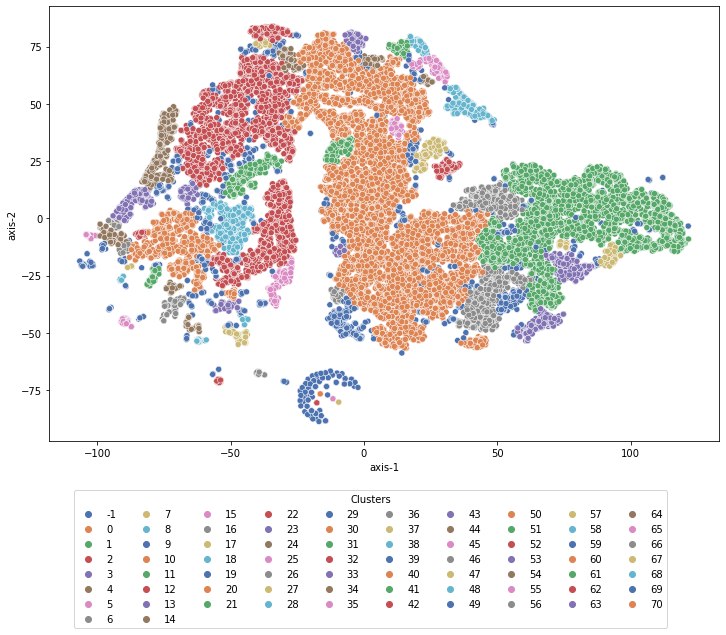

In [30]:
plt.figure(figsize=(12, 8))
p = sns.scatterplot(data = dbscan_df, x = "axis-1", y = "axis-2", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper center", bbox_to_anchor=(0.48, -0.1), ncol=10, title = 'Clusters')
plt.show()

In [31]:
Nociception = ["Ntrk1", "Runx1", "Prdm12", "Th", "Scn10a", "Syt13", "Stra6", "Gal", "Prdm8"]
Mechanoreception = ["Pdlim1","Mmd2", "Pou4f3", "Rnf144a", "Pou6f2", "Dio3", "Onecut3", "Tbx2", "Gpx3", "Ret"]
Mechanoreception1 = ["Pdlim1","Mmd2", "Pou4f3", "Rnf144a"]
Mechanoreception2 = ["Pou6f2", "Dio3", "Onecut3", "Tbx2", "Gpx3", "Ret"]
Proprioception = ["Ntrk3", "Runx3", "Mgst3", "Fam19a4", "Pcp4", "Grm3"]
Fate1 = ["Runx3", "Nfia"]
Fate2 = ["Pou6f2", "Nr5a2", "Hoxb5", "Pdlim1", "Egr1"]
Fate3 = ["Tcf15", "Pdlim1"]
Fate4 = ["Pou6f2", "Onecut3", "Dcc"]

NociceptionCluster = []
MechanoreceptionCluster = []
Mechanoreception1Cluster = []
Mechanoreception2Cluster = []
ProprioceptionCluster = []
Fate1Cluster = []
Fate2Cluster = []
Fate3Cluster = []
Fate4Cluster = []

for gene in Nociception:
    NociceptionCluster.append(clusters.labels_[dfParsed[dfParsed["Gene"] == gene].index[0]])

for gene in Mechanoreception:
    MechanoreceptionCluster.append(clusters.labels_[dfParsed[dfParsed["Gene"] == gene].index[0]])

for gene in Mechanoreception1:
    Mechanoreception1Cluster.append(clusters.labels_[dfParsed[dfParsed["Gene"] == gene].index[0]])

for gene in Mechanoreception2:
    Mechanoreception2Cluster.append(clusters.labels_[dfParsed[dfParsed["Gene"] == gene].index[0]])

for gene in Proprioception:
    ProprioceptionCluster.append(clusters.labels_[dfParsed[dfParsed["Gene"] == gene].index[0]])

for gene in Fate1:
    Fate1Cluster.append(clusters.labels_[dfParsed[dfParsed["Gene"] == gene].index[0]])

for gene in Fate2:
    Fate2Cluster.append(clusters.labels_[dfParsed[dfParsed["Gene"] == gene].index[0]])
    
for gene in Fate3:
    Fate3Cluster.append(clusters.labels_[dfParsed[dfParsed["Gene"] == gene].index[0]])

for gene in Fate4:
    Fate4Cluster.append(clusters.labels_[dfParsed[dfParsed["Gene"] == gene].index[0]])


print("Nociception Cluster: ", NociceptionCluster)
print("Mechanoreception Cluster: ", MechanoreceptionCluster)
print("Mechanoreception1 Cluster: ", Mechanoreception1Cluster)
print("Mechanoreception2 Cluster: ", Mechanoreception2Cluster)
print("Proprioception Cluster: ", ProprioceptionCluster)
print("Fate1 Cluster: ", Fate1Cluster)
print("Fate2 Cluster: ", Fate2Cluster)
print("Fate3 Cluster: ", Fate3Cluster)
print("Fate4 Cluster: ", Fate4Cluster)

Nociception Cluster:  [11, 9, 23, 23, 9, 17, 27, 23, 0]
Mechanoreception Cluster:  [17, 23, 9, 11, 0, 0, 7, -1, 11, 26]
Mechanoreception1 Cluster:  [17, 23, 9, 11]
Mechanoreception2 Cluster:  [0, 0, 7, -1, 11, 26]
Proprioception Cluster:  [17, 23, 23, 23, 23, 9]
Fate1 Cluster:  [23, 23]
Fate2 Cluster:  [0, 0, -1, 17, -1]
Fate3 Cluster:  [0, 17]
Fate4 Cluster:  [0, 7, 11]


In [32]:
nociceptionCluster = 9
mechanoreceptionCluster = 0
mechanoreception1Cluster = 17
mechanoreception2Cluster = 7
proprioceptionCluster = 23

nociceptionGenes = dfParsed[clusters.labels_ == nociceptionCluster]["Gene"].values
mechanoreceptionGenes = dfParsed[clusters.labels_ == mechanoreceptionCluster]["Gene"].values
mechanoreception1Genes = dfParsed[clusters.labels_ == mechanoreception1Cluster]["Gene"].values
mechanoreception2Genes = dfParsed[clusters.labels_ == mechanoreception2Cluster]["Gene"].values
proprioceptionGenes = dfParsed[clusters.labels_ == proprioceptionCluster]["Gene"].values

# Save to csv
nociceptionGenesDf = pd.DataFrame(nociceptionGenes)
mechanoreceptionGenesDf = pd.DataFrame(mechanoreceptionGenes)
mechanoreception1GenesDf = pd.DataFrame(mechanoreception1Genes)
mechanoreception2GenesDf = pd.DataFrame(mechanoreception2Genes)
proprioceptionGenesDf = pd.DataFrame(proprioceptionGenes)

nociceptionGenesDf.to_csv("./data/dbscannociceptionGenes.csv")
mechanoreceptionGenesDf.to_csv("./data/dbscanmechanoreceptionGenes.csv")
mechanoreception1GenesDf.to_csv("./data/dbscanmechanoreception1Genes.csv")
mechanoreception2GenesDf.to_csv("./data/dbscanmechanoreception2Genes.csv")
proprioceptionGenesDf.to_csv("./data/dbscanproprioceptionGenes.csv")